# Homework 1 Clustering and Regression

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Metrics

In a population where the amount of cats is equal to the amount of dogs. Considering the following classification results from a classifier.

Model A Predicted dog Predicted cat
Actual dog 30 20
Actual cat 10 40

In [8]:
# Cats are class 1 (Positive)
class Model_A_Results():
    def __init__(self, results,positive_class='cat',negative_class='dog'):
        self.results = results
        self.TP = results[1,1]
        self.TN = results[0,0]
        self.FP = results[0,1]
        self.FN = results[1,0]
        self.positive_class = positive_class
        self.negative_class = negative_class

    def print_results(self):
        print(f"Predicted cat - Actual cat (TP): {self.TP}")
        print(f"Predicted cat - Actual dog (FP): {self.FP}")
        print(f"Predicted dog - Actual cat (FN): {self.FN}")
        print(f"Predicted dog - Actual dog (TN): {self.TN}")

    def accuracy(self):
        return (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)

    def precision(self):
        return (self.TP) / (self.TP + self.FP)

    def recall(self):
        return (self.TP) / (self.TP + self.FN)

    def F1(self):
        return 2 / (1/self.precision() + 1/self.recall())


results = np.array([[30,20],
                    [10,40]])

model_a = Model_A_Results(results)
model_a.print_results()
#T1
print(f"Accuracy: {model_a.accuracy()}")

#T2
print(f"Precision: {model_a.precision()}")
print(f"Recall: {model_a.recall()}")
print(f"F1: {model_a.F1()}")

#T3,T4,OT1 TOO EZ i wont do it

Predicted cat - Actual cat (TP): 40
Predicted cat - Actual dog (FP): 20
Predicted dog - Actual cat (FN): 10
Predicted dog - Actual dog (TN): 30
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1: 0.7272727272727273


## Hello Clustering


Recall from lecture that K-means has two main steps: the points assignment
step, and the mean update step. After the initialization of the centroids, we
assign each data point to a centroid. Then, each centroids are updated by
re-estimating the means.
Concretely, if we are given N data points, x1, x2, ..., xN , and we would like
to form K clusters. We do the following;
1. Initialization: Pick K random data points as K centroid locations c1,
c2, ..., cK.
2. Assign: For each data point k, find the closest centroid. Assign that
data point to the centroid. The distance used is typically Euclidean distance.
3. Update: For each centroid, calculate the mean from the data points
assigned to it.
4. Repeat: repeat step 2 and 3 until the centroids stop changing (convergence).
Given the following data points in x-y coordinates (2 dimensional)


In [33]:
class Coordinate():
  def __init__(self,x,y,cluster_num = -1):
    self.x = x
    self.y = y
    self.cluster_num = cluster_num

  def __str__(self):
    return f"({self.x},{self.y},cluster {self.cluster_num})"

  def distance(self, other,equation="l2"):
    if(equation.lower() == "l2"):
      return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
    else:
      return abs(self.x - other.x) + abs(self.y - other.y)

class Cluster():
  def __init__(self, k=1, points=[]):
    self.k = k
    self.points = points
    self.centroids = []

  def reset(self):
    self.centroids = []
    self.points = [Coordinate(point.x,point.y) for point in self.points]

  def add_point(self, point):
    self.points.append(point)

  def init_centroids(self, centroids_points=None):
    if not centroids_points:
      self.centroids = random.sample(self.points, self.k)
      for i in range(self.k):
          self.centroids[i].cluster_num = i
    else:
      self.centroids = centroids_points


  def print_centroids(self):
    for centroid in self.centroids:
      print(centroid)

  def assign_points_to_centroids(self):
    for point in self.points:
      min_distance = float('inf')
      closest_centroid = None
      for centroid in self.centroids:
        dist = point.distance(centroid)
        if dist < min_distance:
          min_distance = dist
          closest_centroid = centroid
      point.cluster_num = closest_centroid.cluster_num

  def update_centroids(self):
    new_centroids = []
    for i in range(self.k):
      points_in_cluster = [point for point in self.points if point.cluster_num == i]
      if points_in_cluster:
        centroid_x = sum(point.x for point in points_in_cluster) / len(points_in_cluster)
        centroid_y = sum(point.y for point in points_in_cluster) / len(points_in_cluster)
        new_centroids.append(Coordinate(centroid_x, centroid_y, i))
      self.centroids = new_centroids

  def plot_clusters(self):
    #use matplotlib to plot all points with different color for each cluster with different symbol for centroid
    plt.scatter([point.x for point in self.points], [point.y for point in self.points], c=[point.cluster_num for point in self.points])
    plt.scatter([centroid.x for centroid in self.centroids], [centroid.y for centroid in self.centroids], c='red', marker='x')
    plt.show()

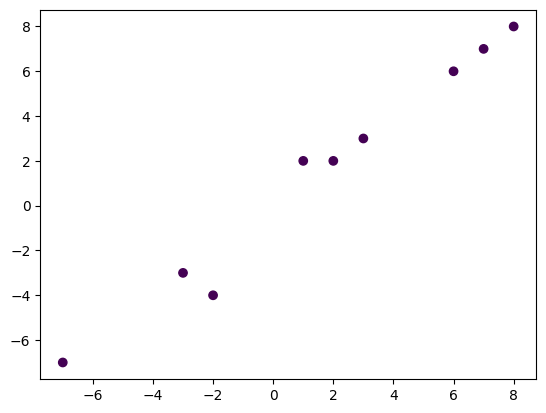

In [34]:
cluster = Cluster(k=4)
cluster.add_point(Coordinate(1,2))
cluster.add_point(Coordinate(3,3))
cluster.add_point(Coordinate(2,2))
cluster.add_point(Coordinate(8,8))
cluster.add_point(Coordinate(6,6))
cluster.add_point(Coordinate(7,7))
cluster.add_point(Coordinate(-3,-3))
cluster.add_point(Coordinate(-2,-4))
cluster.add_point(Coordinate(-7,-7))
cluster.plot_clusters()

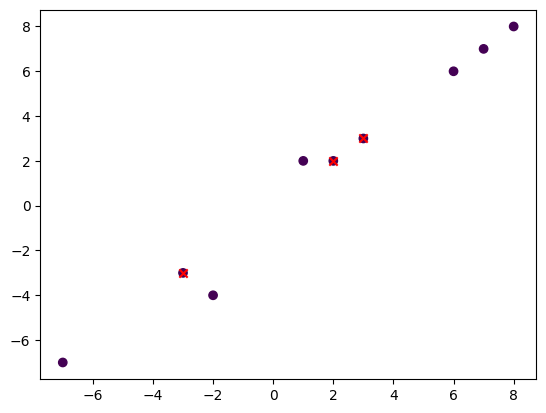

(3,3,cluster 0)
(2,2,cluster 1)
(-3,-3,cluster 2)
Iteration 0


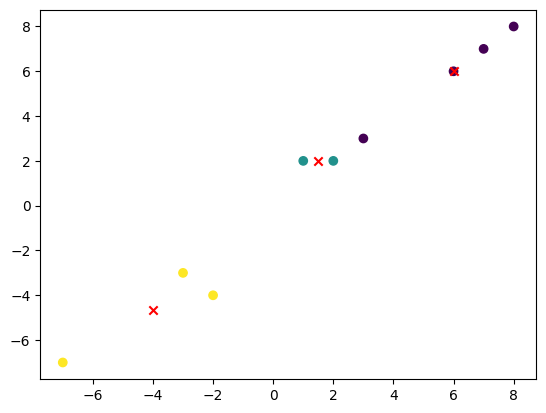

Iteration 1


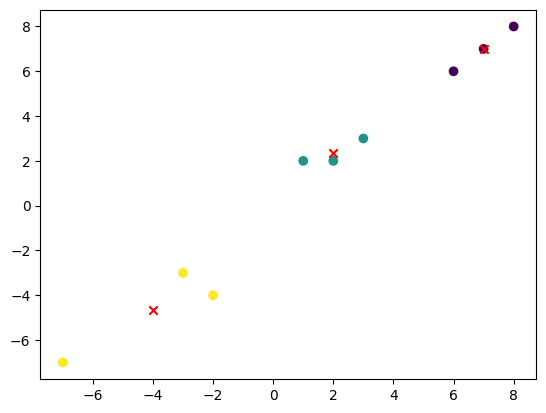

Iteration 2


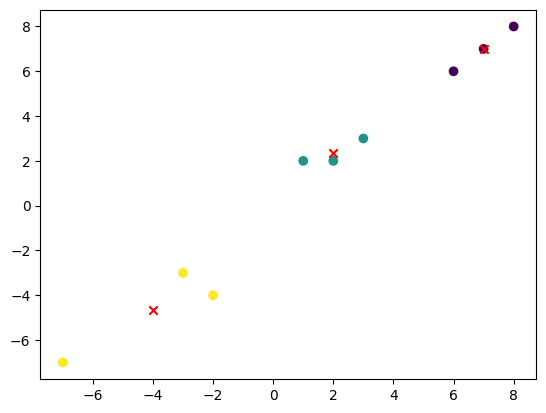

Iteration 3


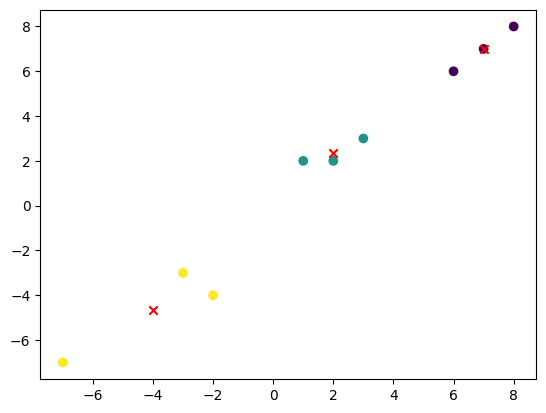

Iteration 4


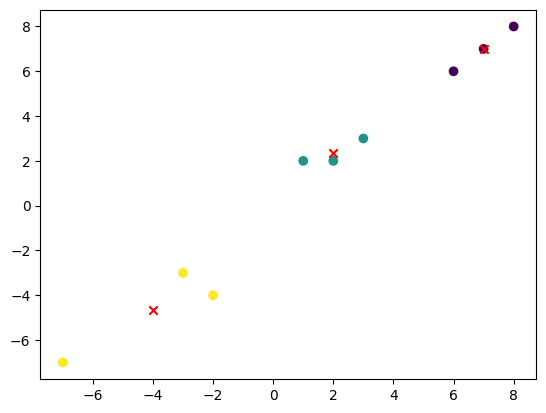

In [37]:
#initialize
cluster.init_centroids(centroids_points=[Coordinate(3,3,0),Coordinate(2,2,1),Coordinate(-3,-3,2)])
cluster.plot_clusters()
cluster.print_centroids()
for i in range(5):
  print(f"Iteration {i}")
  cluster.assign_points_to_centroids()
  cluster.update_centroids()
  cluster.plot_clusters()

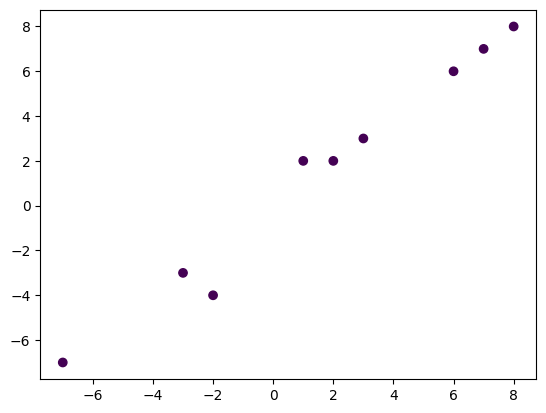

In [36]:
cluster.reset()

#initialize
cluster.init_centroids(centroids_points=[Coordinate(-3,-3,0),Coordinate(2,2,1),Coordinate(-7,-7,2)])
cluster.plot_clusters()
cluster.print_centroids()
for i in range(5):
  print(f"Iteration {i}")
  cluster.assign_points_to_centroids()
  cluster.update_centroids()
  cluster.plot_clusters()